In [3]:
import pandas as pd

# Mengimpor dataset
data = pd.read_csv(r"C:\Users\ASUS\Documents\Machine Learning\2B.csv")


In [5]:
data.head()

,Customer ID,Gender,Birth Date,Married,Dependents,Number of Dependents,Country,City,Number of Referrals,Tenure in Months,...,Avg Monthly GB Download,Premium Tech Support,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Satisfaction Score
0,8779-QRDMV,Male,1946/07/17,No,No,0,United States,Los Angeles,0,1,...,8,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,39.65,0.00,3
1,7495-OOKFY,Female,1950/11/12,Yes,Yes,1,United States,Los Angeles,1,8,...,17,No,No,No,Month-to-Month,Yes,Credit Card,80.65,0.00,3
2,1658-BYGOY,Male,1953/03/21,No,Yes,3,United States,Los Angeles,0,18,...,52,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,45.61,2
3,4598-XLKNJ,Female,1946/03/08,Yes,Yes,1,United States,Inglewood,1,25,...,12,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,98.50,13.43,2
4,4846-WHAFZ,Female,1944/04/02,Yes,Yes,1,United States,Whittier,1,37,...,14,No,No,No,Month-to-Month,Yes,Bank Withdrawal,76.50,0.00,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Birth Date                         7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Country                            7043 non-null   object 
 7   City                               7043 non-null   object 
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Avg Monthly Long Distance Charges  7043 non-null   float64
 11  Internet Service                   7043 non-null   objec

In [9]:
# Cek jumlah missing values di setiap kolom
missing_values = data.isnull().sum()

# Deskripsi statistik data numerik
data_describe = data.describe()

# Menampilkan jumlah missing values
missing_values

Customer ID                             0
Gender                                  0
Birth Date                              0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges       0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Premium Tech Support                    0
Streaming Movies                        0
Streaming Music                         0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Refunds                           0
Satisfaction Score                      0
dtype: int64

## Preprocessing data

In [13]:
# Step 1: Preprocessing - Handling Missing Values
# Mengisi missing values pada 'Internet Type' dengan 'Unknown' karena kategorikal
data['Internet Type'].fillna('Unknown', inplace=True)

# Verifikasi bahwa tidak ada missing values lagi
missing_values_post = data.isnull().sum()

# Step 2: Memastikan Data Siap untuk Analisis
# Menampilkan tipe data terbaru untuk memastikan tidak ada inkonsistensi
data_types = data.dtypes

# Menampilkan hasil preprocessing
missing_values_post, data_types


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10680\2307207229.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Internet Type'].fillna('Unknown', inplace=True)


(Customer ID                          0
 Gender                               0
 Birth Date                           0
 Married                              0
 Dependents                           0
 Number of Dependents                 0
 Country                              0
 City                                 0
 Number of Referrals                  0
 Tenure in Months                     0
 Avg Monthly Long Distance Charges    0
 Internet Service                     0
 Internet Type                        0
 Avg Monthly GB Download              0
 Premium Tech Support                 0
 Streaming Movies                     0
 Streaming Music                      0
 Contract                             0
 Paperless Billing                    0
 Payment Method                       0
 Monthly Charge                       0
 Total Refunds                        0
 Satisfaction Score                   0
 dtype: int64,
 Customer ID                           object
 Gender            

## EDA

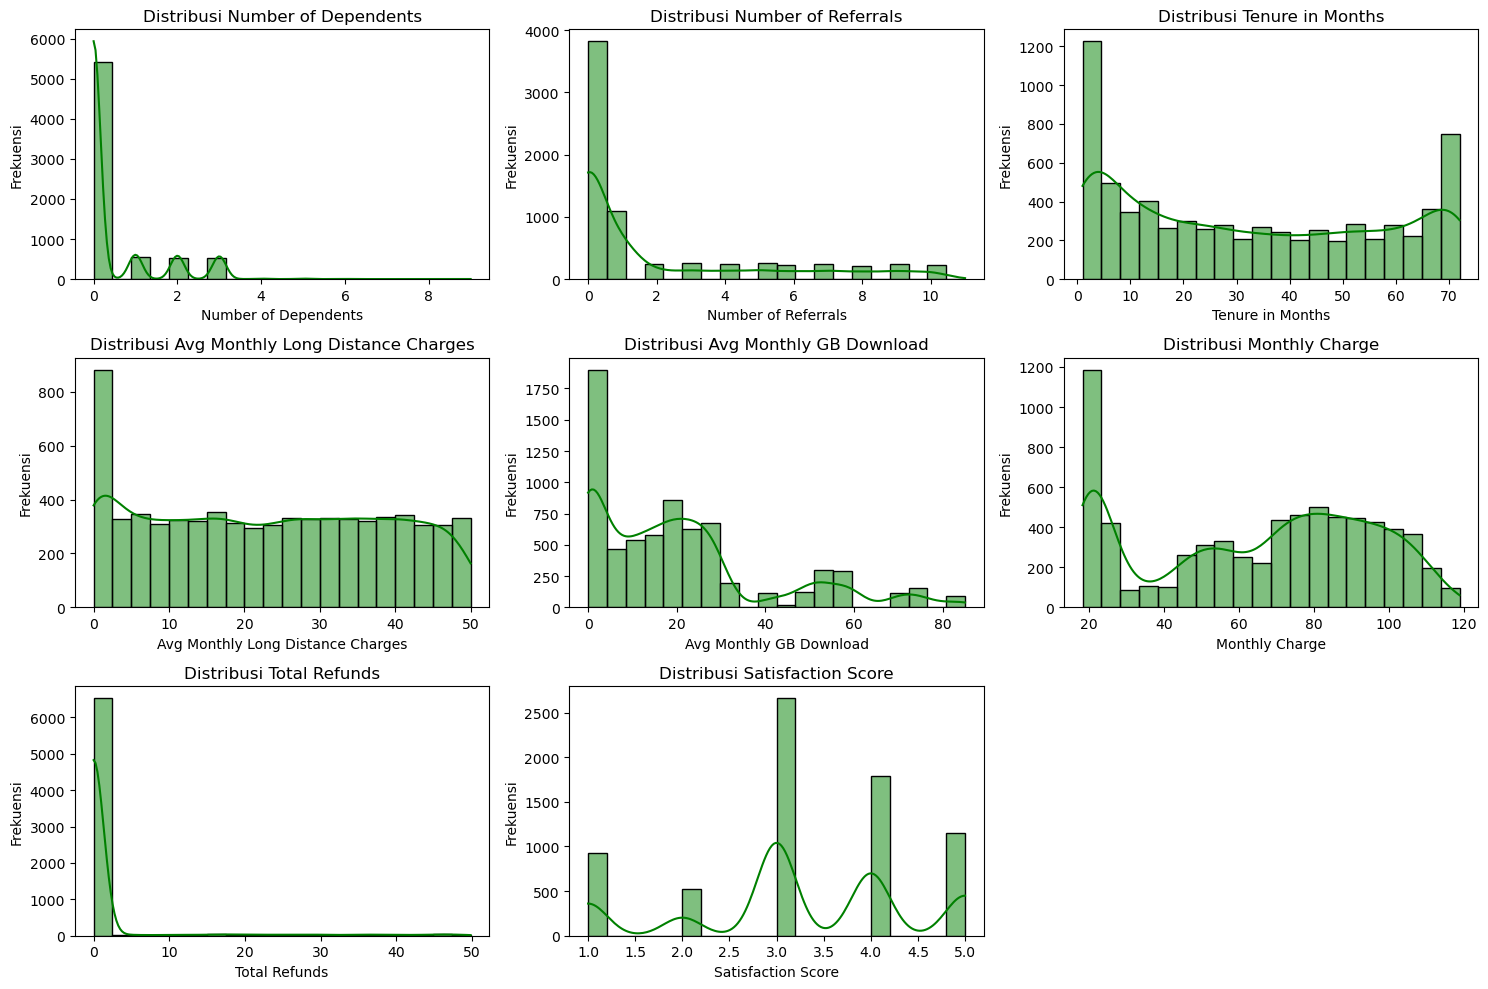

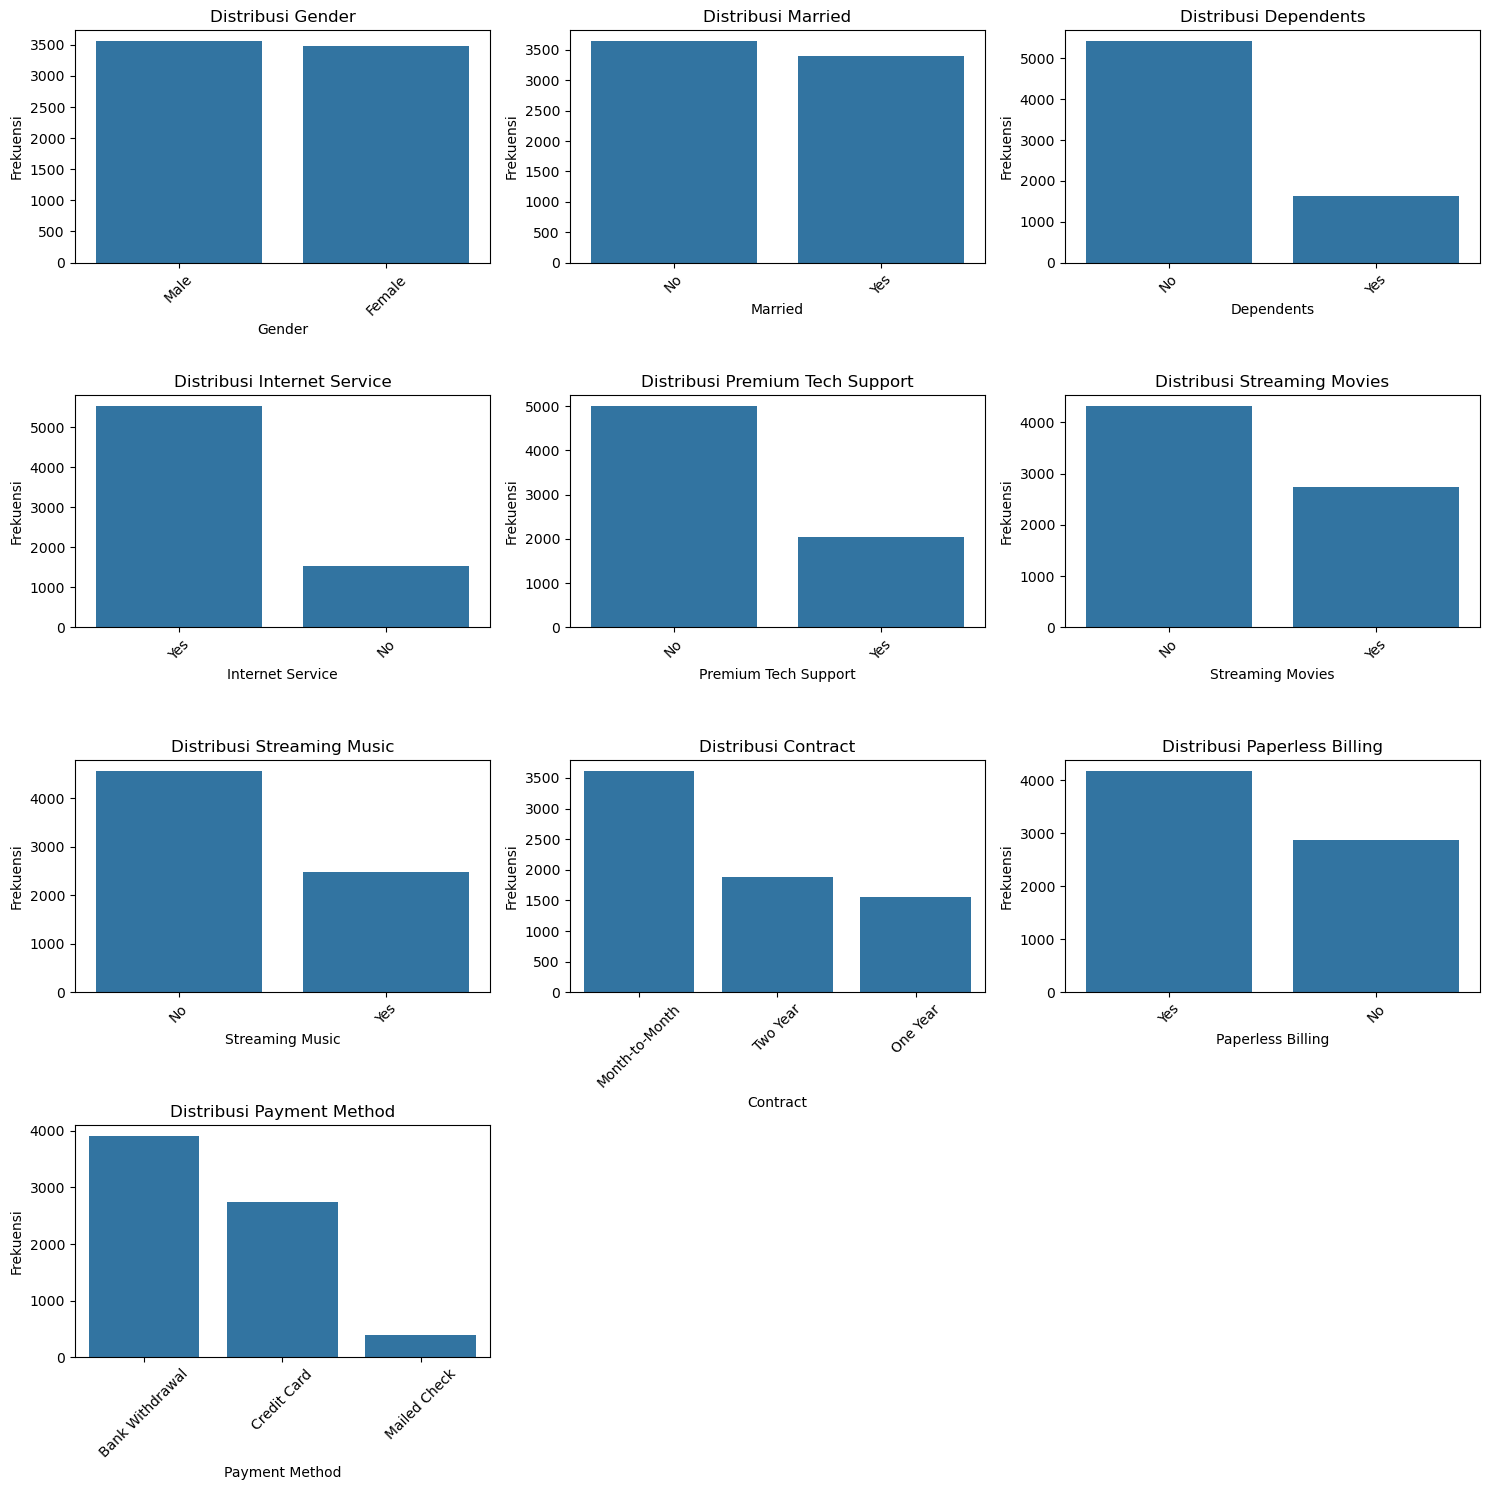

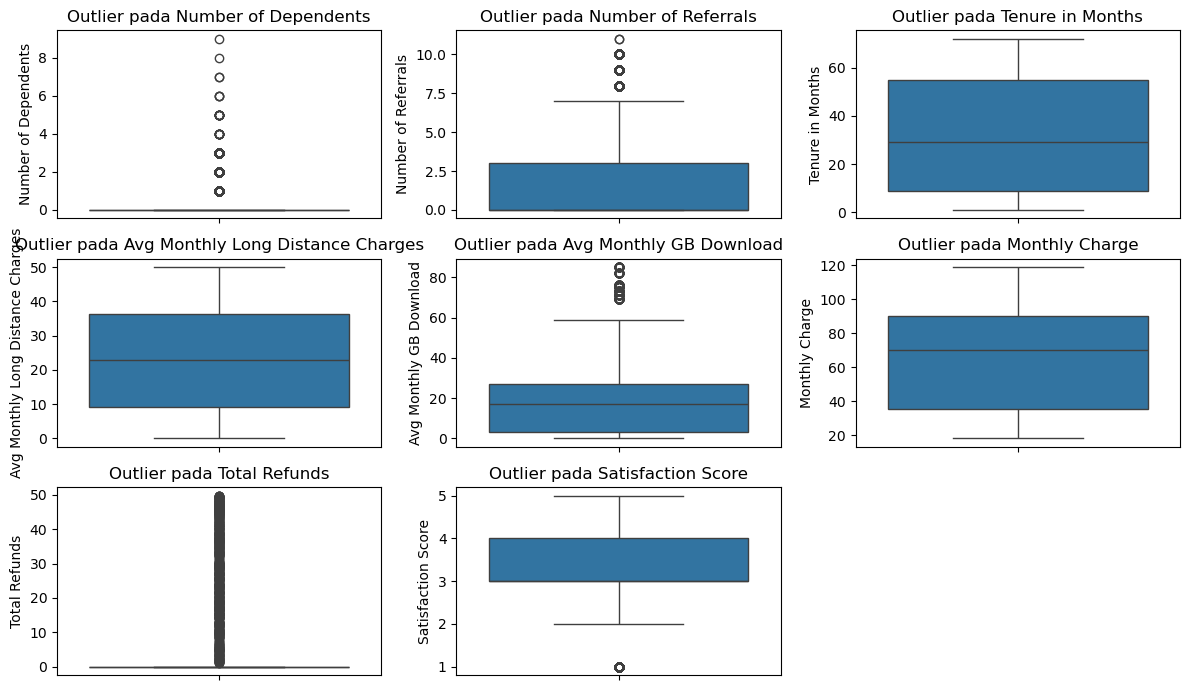

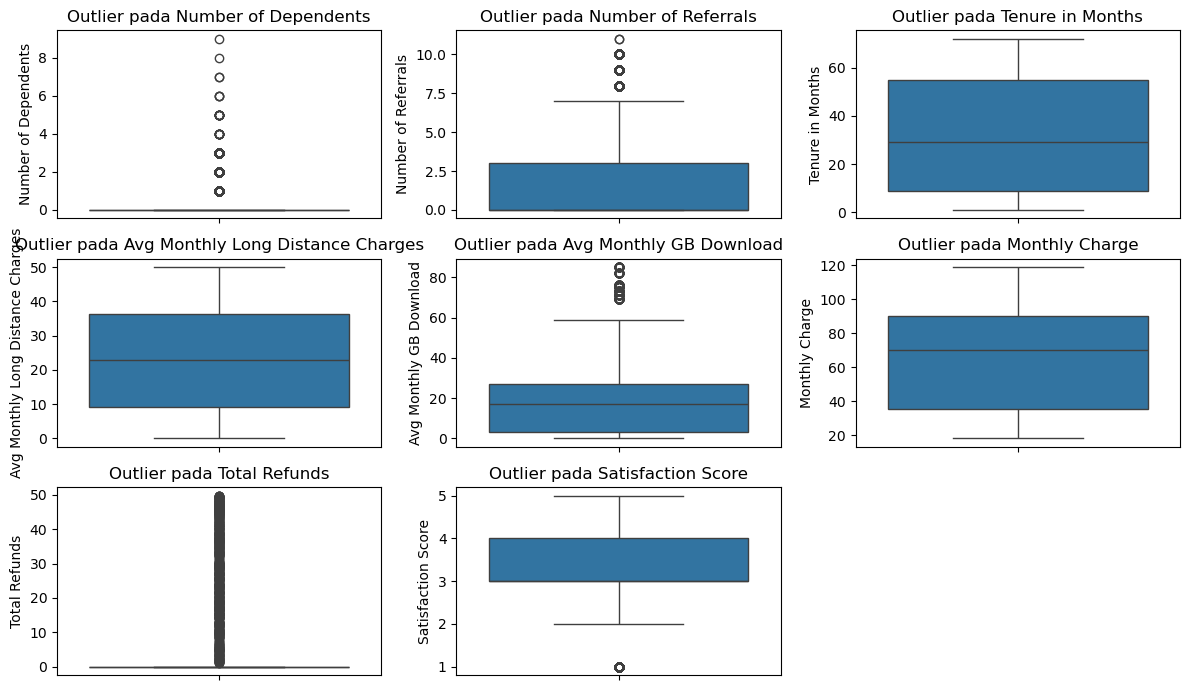

In [81]:
# EDA - Distribusi Variabel Numerik
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[column], kde=True, bins=20, color='green')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# EDA - Distribusi Variabel Kategorikal
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_columns):
    plt.subplot(4, 3, i + 1)
    sns.countplot(data=data, x=column, hue=None, order=data[column].value_counts().index)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Deteksi outlier dengan boxplot pada data numerik
plt.figure(figsize=(12, 7))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data, y=column, hue=None)
    plt.title(f'Outlier pada {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data, y=column, hue=None)
    plt.title(f'Outlier pada {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


## Encoding variabel kategorikal

#### Konversi kolom Birth Date menjadi Age

In [33]:
from datetime import datetime

# Salin dataset untuk memastikan data asli tidak terganggu
data_cluster = data.copy()

# Konversi kolom Birth Date menjadi usia (Age)
current_year = datetime.now().year
data_cluster['Age'] = current_year - pd.to_datetime(data_cluster['Birth Date']).dt.year

# Hapus kolom Birth Date karena sudah digantikan dengan Age
data_cluster = data_cluster.drop(columns=['Birth Date'])

# Periksa hasil perubahan
print(data_cluster.head())
print(data_cluster.dtypes)


  Customer ID  Gender Married Dependents  Number of Dependents        Country  \
0  8779-QRDMV    Male      No         No                     0  United States   
1  7495-OOKFY  Female     Yes        Yes                     1  United States   
2  1658-BYGOY    Male      No        Yes                     3  United States   
3  4598-XLKNJ  Female     Yes        Yes                     1  United States   
4  4846-WHAFZ  Female     Yes        Yes                     1  United States   

          City  Number of Referrals  Tenure in Months  \
0  Los Angeles                    0                 1   
1  Los Angeles                    1                 8   
2  Los Angeles                    0                18   
3    Inglewood                    1                25   
4     Whittier                    1                37   

   Avg Monthly Long Distance Charges  ... Premium Tech Support  \
0                               0.00  ...                   No   
1                              48.85  

#### Encoding menggunakan One-Hot encoder

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar fitur kategorikal yang akan di-encode
categorical_features_updated = [
    'Gender', 'Married', 'Dependents', 'Internet Service',
    'Internet Type', 'Premium Tech Support', 'Streaming Movies',
    'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method'
]

# OneHotEncoder untuk fitur kategorikal
column_transformer_updated = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features_updated)
    ],
    remainder='passthrough'  # Biarkan kolom numerik tetap
)

# Transformasi data
data_transformed_updated = column_transformer_updated.fit_transform(data_cluster)

# Tampilkan bentuk data setelah encoding
print(data_transformed_updated.shape)

(7043, 24)


#### Normalisasi Data

In [47]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data
scaler_updated = StandardScaler()
data_normalized_updated = scaler_updated.fit_transform(data_transformed_updated)

# Tampilkan bentuk data setelah normalisasi
print(data_normalized_updated.shape)


(7043, 24)


#### mendapatkan nama fitur dari encoding

In [49]:
# Dapatkan nama fitur dari encoding dan gabungkan dengan fitur numerik
encoded_feature_names = column_transformer_updated.named_transformers_['cat'].get_feature_names_out(categorical_features_updated)
numerical_features = [col for col in data_cluster.columns if col not in categorical_features_updated]
final_feature_names = list(encoded_feature_names) + numerical_features

# Konversi hasil normalisasi ke DataFrame
data_normalized_df = pd.DataFrame(data_normalized_updated, columns=final_feature_names)

# Tampilkan hasil
print(data_normalized_df.head())


   Gender_Male  Married_Yes  Dependents_Yes  Internet Service_Yes  \
0     0.990532    -0.966622       -0.548093              0.525927   
1    -1.009559     1.034530        1.824507              0.525927   
2     0.990532    -0.966622        1.824507              0.525927   
3    -1.009559     1.034530        1.824507              0.525927   
4    -1.009559     1.034530        1.824507              0.525927   

   Internet Type_DSL  Internet Type_Fiber Optic  Internet Type_Unknown  \
0           1.806465                  -0.870193              -0.525927   
1          -0.553567                   1.149171              -0.525927   
2          -0.553567                   1.149171              -0.525927   
3          -0.553567                   1.149171              -0.525927   
4          -0.553567                   1.149171              -0.525927   

   Premium Tech Support_Yes  Streaming Movies_Yes  Streaming Music_Yes  ...  \
0                 -0.639439              1.256171            

#### Fine tuning K-Means

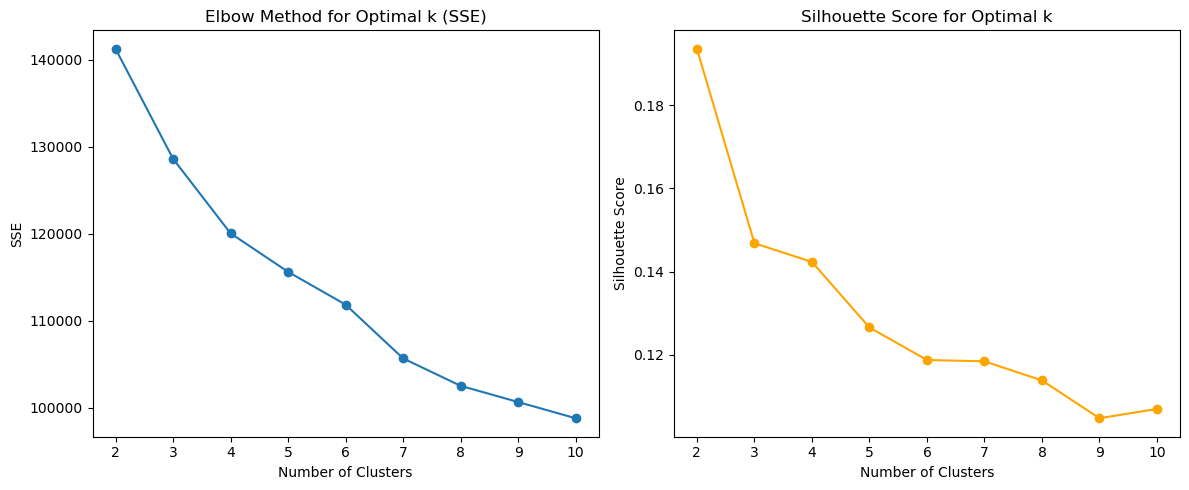

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# menentukan rentang jumlah cluster yang akan diuji
range_n_clusters = range(2, 11)

# menyimpan hasil evaluasi
sse = []  # Sum of Squared Errors
silhouette_scores = []  # Silhouette Scores

# Loop untuk mencoba berbagai jumlah cluster
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_normalized_updated)
    
    # Hitung SSE
    sse.append(kmeans.inertia_)
    
    # Hitung Silhouette Score (untuk jumlah cluster >= 2)
    silhouette_avg = silhouette_score(data_normalized_updated, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualisasi SSE dan Silhouette Score
plt.figure(figsize=(12, 5))

# Plot SSE
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, sse, marker='o')
plt.title('Elbow Method for Optimal k (SSE)')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

penjelasan SSE:

   >SSE menurun ketika jumlah cluster bertambah karena data dibagi lebih kecil ke dalam kelompok.
   >Elbow Point (titik siku) adalah titik di mana penurunan SSE menjadi semakin kecil (tidak signifikan), menandakan jumlah cluster optimal.
interpretasi:
>Pada grafik, penurunan SSE signifikan hingga sekitar k = 4, setelah itu menjadi lebih lambat.
>Jumlah cluster optimal berdasarkan SSE: 4.


penjelasan Silhouette:

Sumbu X: Jumlah cluster (Number of Clusters).

Sumbu Y: Silhouette Score, yang mengukur seberapa baik data dalam satu cluster dibandingkan dengan cluster lainnya.

    Nilai antara -1 hingga 1:
    
   >Mendekati 1: Cluster terpisah dengan baik.
   
   >Mendekati 0: Cluster tumpang tindih.
   
   >Negatif: Data mungkin berada di cluster yang salah.

Interpretasi:

Silhouette Score tertinggi: terjadi pada k = 3 dengan nilai sekitar 0.14+.

Semakin banyak cluster, nilai Silhouette Score menurun, menunjukkan cluster menjadi kurang baik dipisahkan.


In [91]:
# jumlah cluster terbaik berdasarkan Silhouette Score
optimal_k = 3  # Pilih jumlah cluster berdasarkan evaluasi Silhouette Score

# Model K-Means dengan jumlah cluster optimal
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
data_normalized_df['Cluster'] = kmeans_final.fit_predict(data_normalized_updated)

# jumlah data di setiap cluster
print(data_normalized_df['Cluster'].value_counts())

# Jika diperlukan, lanjutkan dengan analisis cluster dan visualisasi


Cluster
2    3148
1    2369
0    1526
Name: count, dtype: int64


#### Visualisasi PCA

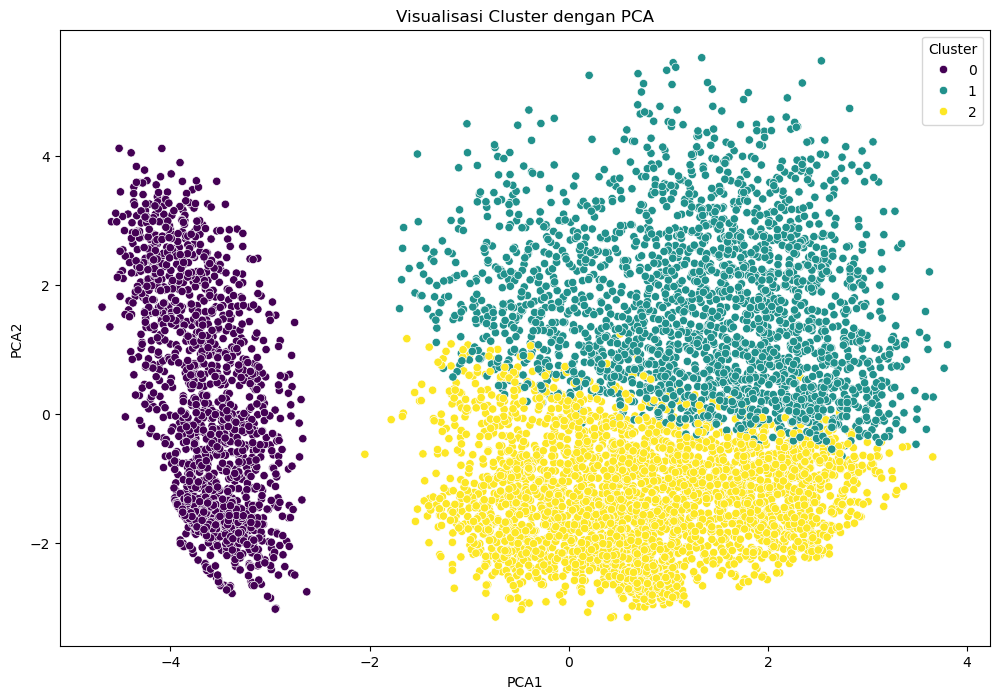

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized_updated)
data_cluster['PCA1'] = pca_result[:, 0]
data_cluster['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_cluster, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Visualisasi Cluster dengan PCA')
plt.show()


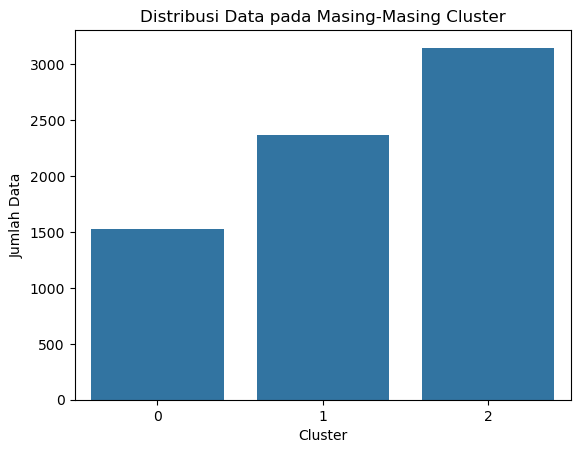

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi cluster
sns.countplot(x=data_normalized_df['Cluster'], hue=None)
plt.title('Distribusi Data pada Masing-Masing Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()


Interpretasi:

Cluster 2 (Jumlah Data Terbanyak):

Cluster 2 mendominasi dengan jumlah data lebih dari 3.000 sampel.

Hal ini menunjukkan bahwa sebagian besar data memiliki pola atau fitur yang mirip, sehingga tergabung dalam kelompok ini.
Cluster 0 (Jumlah Data Terkecil):

Cluster 0 memiliki jumlah data yang jauh lebih sedikit dibandingkan cluster lainnya, sekitar 1.500 sampel.

Data ini mungkin memiliki pola yang lebih unik atau berbeda dibandingkan cluster lainnya.

Ketidakseimbangan Ukuran Cluster:

Ketidakseimbangan jumlah data antar cluster dapat menunjukkan bahwa dataset memiliki pola yang lebih umum di cluster tertentu (misalnya, Cluster 2).

Cluster dengan jumlah data lebih kecil (seperti Cluster 0) mungkin memiliki data dengan karakteristik lebih spesifik atau unik.

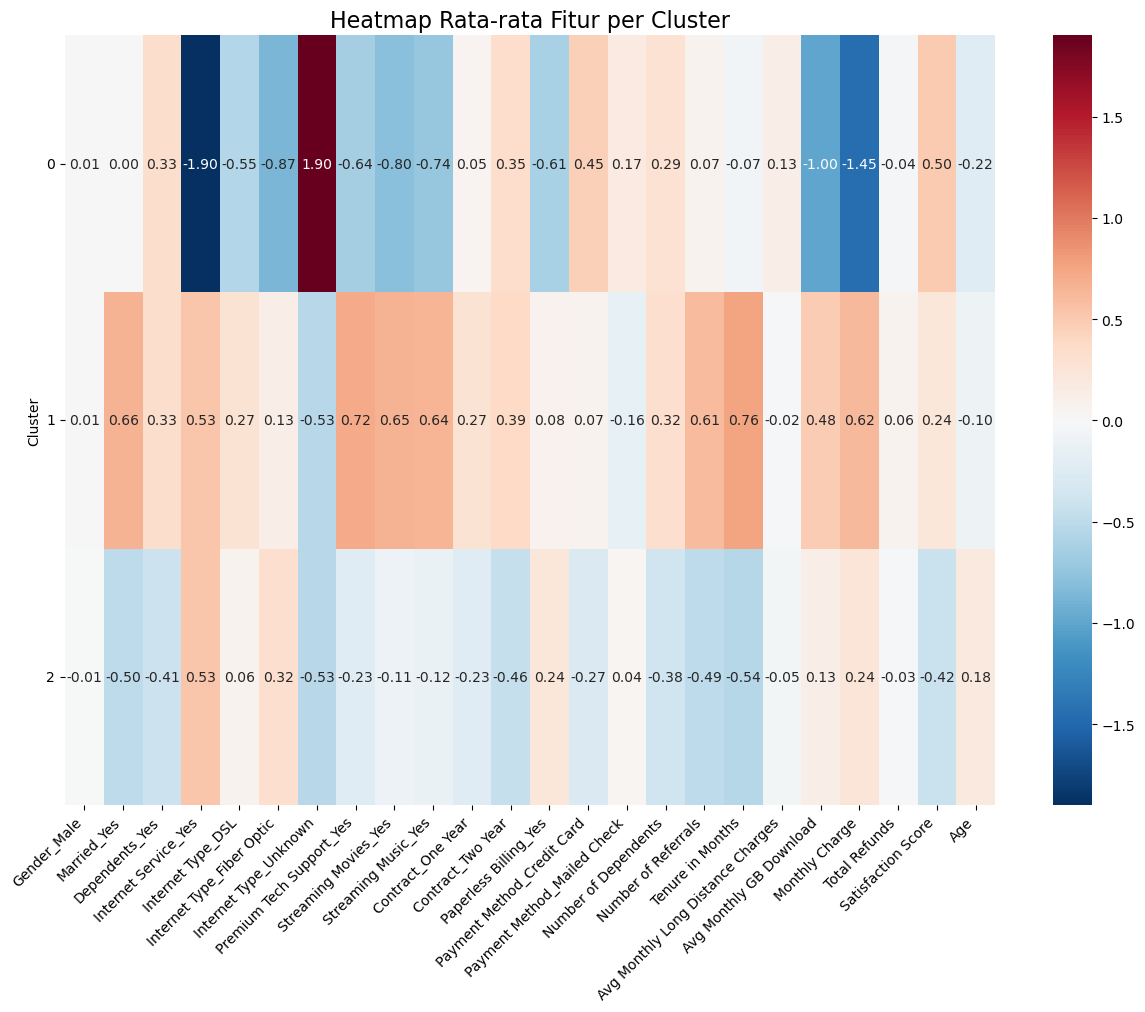

In [55]:
# Rata-rata fitur per cluster
cluster_summary = data_normalized_df.groupby('Cluster').mean()

# Visualisasi heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    cluster_summary,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    cbar=True
)
plt.title("Heatmap Rata-rata Fitur per Cluster", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


In [57]:
# Analisis cluster
for cluster in cluster_summary.index:
    print(f"Cluster {cluster}:")
    print(cluster_summary.loc[cluster])
    print("\n")


Cluster 0:
Gender_Male                          0.011457
Married_Yes                          0.001170
Dependents_Yes                       0.327250
Internet Service_Yes                -1.901403
Internet Type_DSL                   -0.553567
Internet Type_Fiber Optic           -0.870193
Internet Type_Unknown                1.901403
Premium Tech Support_Yes            -0.639439
Streaming Movies_Yes                -0.796070
Streaming Music_Yes                 -0.739062
Contract_One Year                    0.047710
Contract_Two Year                    0.346491
Paperless Billing_Yes               -0.610375
Payment Method_Credit Card           0.447837
Payment Method_Mailed Check          0.171759
Number of Dependents                 0.291176
Number of Referrals                  0.074124
Tenure in Months                    -0.073360
Avg Monthly Long Distance Charges    0.130447
Avg Monthly GB Download             -1.004796
Monthly Charge                      -1.451829
Total Refunds          